In [19]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
X,y = make_classification(n_samples = 100,n_features = 2,n_informative=1,n_redundant=0,
                         n_classes=2,n_clusters_per_class = 1,
                        random_state = 41,hypercube=False,class_sep=15)

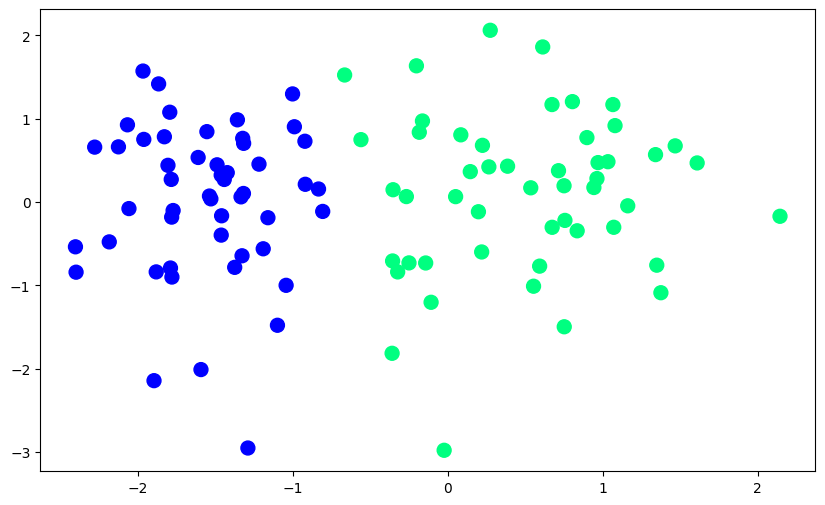

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [22]:
def step(a):
    return 1 if a >0 else 0

# **Single Layer Perceptron**

In [35]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1) #adding a row of 1 for the bais function
    weights = np.ones(X.shape[1]) #assigning weights as 1 according to the no' of rows
    lr = 0.1

    for i in range(1000):
    
       j = np.random.randint(0,100) #generating random value of x
       y_hat = step(np.dot(weights,X[j])) #predict the y value
       weights = weights + lr*(y[j]-y_hat)*X[j] #updating weights for accuracy
       
    return weights[0],weights[1:] #return w_not and coefficients

In [36]:
intercept,coef=perceptron(X,y)

In [37]:
print(coef)
print(intercept)

[1.3216399  0.20250752]
1.0


(-3.0, 2.0)

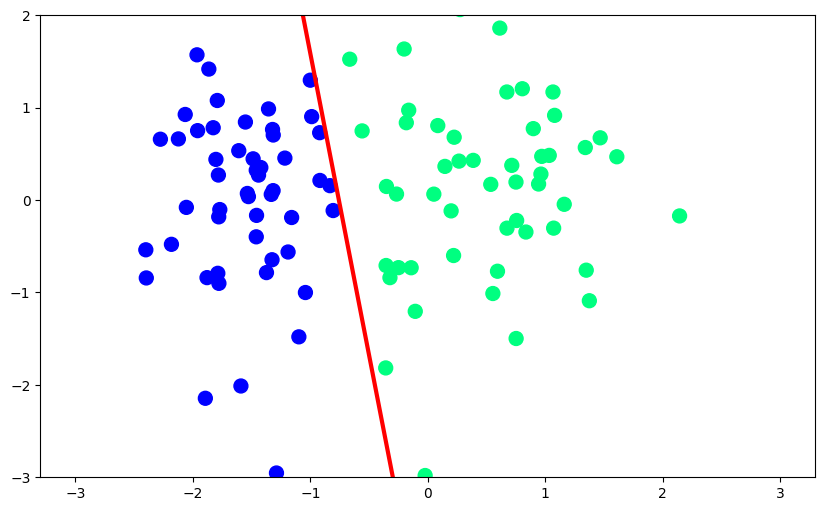

In [38]:
m = -(coef[0]/coef[1])
b = -(intercept/coef[1])

x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# **Perceptron with hinge loss fucntion**

In [15]:
def perceptron_1(X,y):
    w1=w2=b=1 
    lr=0.1
    for j in range(10000):
        for i in range(X.shape[0]): #running loop for every row and every column
            z = w1*X[i][0]+w2*X[i][1]+b #calculating f(x) 
            
            if z*y[i] < 0: #checking if smaller than 0
                w1 = w1 + lr*y[i]*X[i][0] # gradient decent
                w2 = w2 + lr*y[i]*X[i][1] # gradient decent
                b = b + lr*y[i] # gradient decent
                
    return w1,w2,b            
        

In [16]:
w1,w2,b = perceptron_1(X,y)

In [17]:
m = -(w1/w2)
b = -(b/w2)
print(m)
print(b)

-6.108023124170937
-9.250656660875727


(-3.0, 2.0)

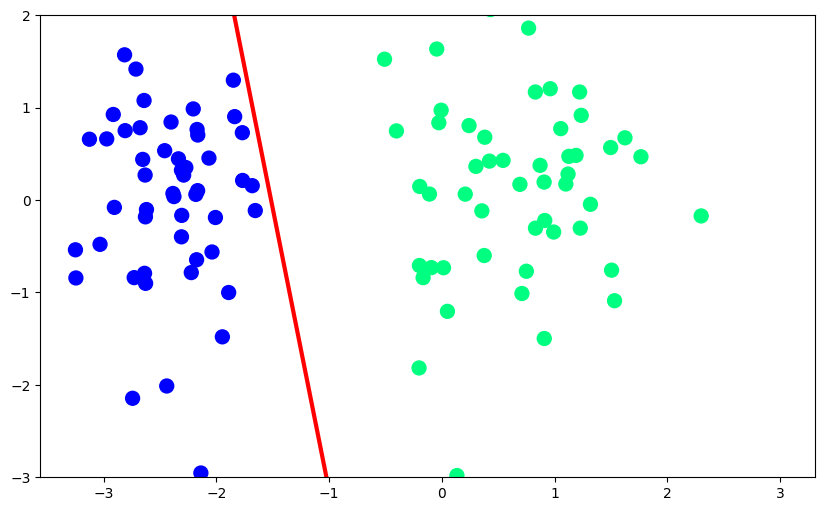

In [22]:

x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)